## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse #ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

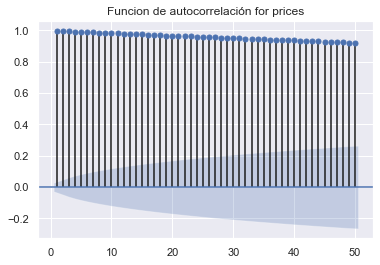

In [5]:
sgt.plot_acf(df.market_value, zero = False, lags = 50)
plt.title('Funcion de autocorrelación for prices')
plt.show()

## The PACF

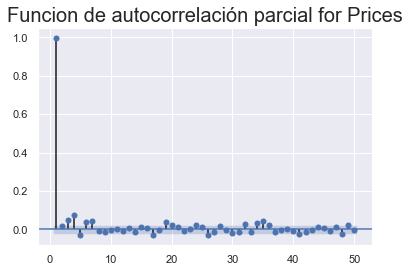

In [6]:
sgt.plot_pacf(df.market_value, lags = 50, alpha = 0.08, zero = False, method = ('ols'))
plt.title("Funcion de autocorrelación parcial for Prices", size = 20)
plt.show()

## The AR(1) Model
Con 1 retraso

In [7]:
#ARMA = se pasa los datos a analizar
#order = modelo especifico, el 1 representa el numero de elementos pasados o con retraso
#y el 0 es que no toma valores residuales
model_ar = ARMA(df.market_value, order=(1,0))

In [8]:
#Entrenamos el modelo 
results_ar = model_ar.fit()

In [9]:
#Resumen de los resultados
results_ar.summary()
#nos devuelve el const 
#y el arl.market_value (Es la tabla que se le paso y lo asume como L1 porque es el retraso)
#Coef = Estimación 
#Errores de la desviación estandar
#Z = Valor estadistico de prueba para contraste de hipotesis != de 0 en este caso


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Mon, 18 Oct 2021   AIC                          55251.196
Time:                        19:58:52   BIC                          55270.761
Sample:                    01-07-1994   HQIC                         55258.052
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5058.2337    485.549     10.418      0.000    4106.576    6009.892
ar.L1.market_value     0.9985      0.001   1298.498      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

## Higher-Lag AR Models

In [10]:
model_ar_2 = ARMA(df.market_value, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Mon, 18 Oct 2021   AIC                          55251.742
Time:                        20:01:07   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    495.717     10.267      0.000    4118.053    6061.229
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4626           +0.0000j           58.4626            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
model_ar_3 = ARMA(df.market_value, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.866
Method:                       css-mle   S.D. of innovations             59.178
Date:                Mon, 18 Oct 2021   AIC                          55241.732
Time:                        20:01:09   BIC                          55274.339
Sample:                    01-07-1994   HQIC                         55253.158
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5054.8315    519.154      9.737      0.000    4037.308    6072.355
ar.L1.market_value     0.9806      0.014     69.619      0.000       0.953       1.008
ar.L2.market_value    -0.0309      0.020     -1.563      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.466      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           -0.0000j            1.0013           -0.0000
AR.2           -0.1851           -4.5161j            4.5199           -0.2565
AR.3           -0.1851           +4.5161j            4.5199            0.2565
-----------------------------------------------------------------------------
"""

In [20]:
model_ar_4 = ARMA(df.market_value, order=[4,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Mon, 18 Oct 2021   AIC                          55217.130
Time:                        20:15:41   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    559.964      9.089      0.000    3992.132    6187.150
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

## LLR Test

In [17]:
#Determina si los modelos son diferentes
#Tiene que ser 2 modelos y nos devuelve el p valor
#el DF son grados de libertad y la cantidad de diferencias que se tiene
#Ej el retraso es 1 para la comparación entre mod_1 y mod_2
def LLR_test(mod_1, mod_2, DF=1):
    #El .llf es las verosimilitudes
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    #aqui se compara la distribución usando chi cuadrado
    #donde se recibe el Valor de estadistico y valor de libertad
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher-Lag AR Models

In [14]:
#Para este caso la salida es de 0.001 entonces podemos decir que entre modelos más complejos hay mejoras
LLR_test(results_ar_2, results_ar_3)

0.001

In [16]:
LLR_test(results_ar_3, results_ar_4)

0.0

In [18]:
model_ar_4 = ARMA(df.market_value, order = [4,0])
results_ar_4 = model_ar_4.fit()

print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(results_ar_3, results_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Mon, 18 Oct 2021   AIC                          55217.130
Time:                        20:14:41   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    559.964      9.089      0.000    3992.132    6187.150
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value  

In [19]:
model_ar_5 = ARMA(df.market_value, order=(5,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_4, results_ar_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 0)   Log Likelihood              -27600.348
Method:                       css-mle   S.D. of innovations             58.996
Date:                Mon, 18 Oct 2021   AIC                          55214.697
Time:                        20:14:46   BIC                          55260.346
Sample:                    01-07-1994   HQIC                         55230.693
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    543.613      9.363      0.000    4024.179    6155.104
ar.L1.market_value     0.9791      0.014     69.481      0.000       0.952       1.007
ar.L2.market_value  

In [21]:
model_ar_6 = ARMA(df.market_value, order=(6,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_5, results_ar_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 0)   Log Likelihood              -27596.474
Method:                       css-mle   S.D. of innovations             58.950
Date:                Mon, 18 Oct 2021   AIC                          55208.947
Time:                        20:15:59   BIC                          55261.118
Sample:                    01-07-1994   HQIC                         55227.229
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6414    565.237      9.004      0.000    3981.797    6197.486
ar.L1.market_value     0.9803      0.014     69.604      0.000       0.953       1.008
ar.L2.market_value  

In [22]:
model_ar_7 = ARMA(df.market_value, order=(7,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_6, results_ar_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Mon, 18 Oct 2021   AIC                          55201.799
Time:                        20:16:09   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    589.574      8.633      0.000    3934.097    6245.186
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [23]:
model_ar_8 = ARMA(df.market_value, order=(8,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_7, results_ar_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.995
Method:                       css-mle   S.D. of innovations             58.896
Date:                Mon, 18 Oct 2021   AIC                          55203.990
Time:                        20:16:15   BIC                          55269.203
Sample:                    01-07-1994   HQIC                         55226.841
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5472.4971    944.302      5.795      0.000    3621.700    7323.294
ar.L1.market_value     0.9790      0.014     69.569      0.000       0.951       1.007
ar.L2.market_value  

In [24]:
#En este caso podemos d ecir que el modelo 7 es mejor, el DF pasa la cantidad de retrasos en este caso 6 días
print("LLR test: " + str(LLR_test(results_ar, results_ar_7, DF = 6)))

LLR test: 0.0


## Analysing the Residuals

In [29]:
#Los residuos los obtenemos con .resid
df['residuos_price'] = results_ar_7.resid

<ipython-input-29-44a5692ab6b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuos_price'] = results_ar_7.resid


In [30]:
#Los residuos deben ser como ruido blanco
#Para este caso recibimos los p valores
sts.adfuller(df.res_price)

(-76.07468575126899,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 54842.41508486545)

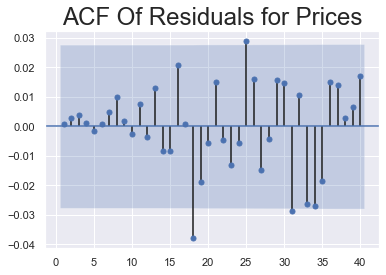

In [32]:
#Se sabe que el modelo no tiene autocorrelación si los puntos en su mayoria estan en el area azul
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

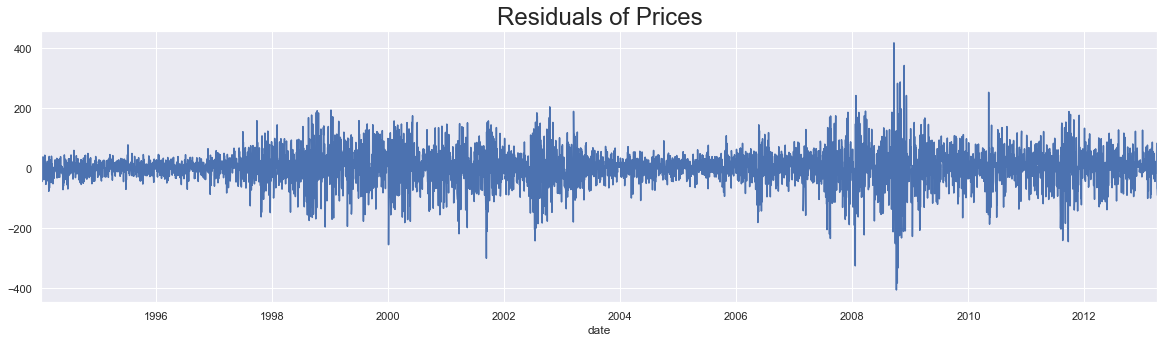

In [28]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()